# Module 5 Assessment 

Welcome to your Module 5 Assessment. You will be tested for your understanding of concepts and ability to programmatically solve problems that have been covered in class and in the curriculum. 

**_Read the instructions very carefully!_** You will be asked both to write code and respond to a few short answer questions.  

The goal here is to demonstrate your knowledge. Showing that you know things about certain concepts and how to apply different methods is more important than getting the best model.

You will have up to 120 minutes to complete this assessment.

The sections of the assessment are:

- Decision Trees
- Ensemble Models 
- PCA
- Clustering

**Note on the short answer questions**: 
> Please use your own words, even if you consult another source to help you craft your response. Short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, but do your best to communicate your answers clearly!


## Decision Trees

### Concepts 
You're given a dataset of 30 elements, 15 of which belong to a positive class (denoted by **+**) and 15 of which do not (denoted by __-__). These elements are described by two attributes, A and B, that can each have either one of two values, true or false. 

The diagrams below show the result of splitting the dataset by attribute: the diagram on the left hand side shows the class distribution of elements obtained when splitting the data by attribute A, and the diagram of the right hand side shows the class distribution of elements obtained when splitting the data by attribute B. 

<img src="images/decision_stump.png">

**1.1) Which one of the two attributes resulted in the best split of the original data? How do you select the best attribute to split a tree at each node?** _(Hint: Mention splitting criteria)_

In [ ]:
# Your answer here
"""
The splitting criteria question here will be: is the element belong to a positive class? 
I would say the first attributes resulted in the best split by identifying 13 elements right in both the positive 
and negative class and only miss classify 2 elements in each class. While the second attributes identify only 8 
elements and miss classify 7 elements in the postive class and 7 right and 8 miss classifed in the negative class.

So, the best attribute to split a decision tree is generally chosen that will give a maximum information gain 
for a given criterion or that could reduce the heterogeneity of the dataset.  
"""

### Decision Trees for Regression 

In this section, you will use decision trees to fit a regression model to the Combined Cycle Power Plant dataset. 

This dataset is from the UCI ML Dataset Repository, and has been included in the `data` folder of this repository as an Excel `.xlsx` file, `Folds5x2_pp.xlsx`. 

The features of this dataset consist of hourly average ambient variables taken from various sensors located around a power plant that record the ambient variables every second.  
- Temperature (AT) 
- Ambient Pressure (AP) 
- Relative Humidity (RH)
- Exhaust Vacuum (V) 

The target to predict is the net hourly electrical energy output (PE). 

The features and target variables are not normalized.

In the cells below, we import `pandas` and `numpy` for you, and we load the data into a pandas DataFrame. We also include code to inspect the first five rows and get the shape of the DataFrame.

In [1]:
import pandas as pd
import numpy as np

# Load the data
filename = 'data/Folds5x2_pp.xlsx'
df = pd.read_excel(filename)

In [2]:
# Inspect the first five rows of the dataframe
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Get the shape of the dataframe
df.shape

(9568, 5)

Before fitting any models, you need to create training and testing splits for the data.

Below, we split the data into features and target ('PE') for you. 

In [4]:
X = df[df.columns.difference(['PE'])]
y = df['PE']

**1.2) Split the data into training and test sets. Create training and test sets with `test_size=0.5` and `random_state=1`.** 

In [7]:
# Your code here. Replace None with appropriate code.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
print("Training Dataset Shape: ", X_train.shape)
print("Test Dataset Shape: ", X_test.shape)

Training Dataset Shape:  (4784, 4)
Test Dataset Shape:  (4784, 4)


**1.3) Fit a vanilla decision tree regression model with scikit-learn to the training data.** Set `random_state=1` for reproducibility. **Evaluate the model on the test data.** 

In [8]:
# Your code here 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

**1.4) Obtain the mean squared error, mean absolute error, and coefficient of determination (r2 score) of the predictions on the test set.** _Hint: Look at the `sklearn.metrics` module._

In [9]:
# Your code here. Replace None with appropriate code.
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

# y_hat
y_pred = regressor.predict(X_test)

print("Mean Squared Error:", mse(y_test, y_pred))
print("Mean Absolute Error:", mae(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 22.21041691053512
Mean Absolute Error: 3.223405100334449
R-squared: 0.9250580726905822


Hint: MSE = 22.21041691053512

## Ensemble Methods

### Introduction to Ensemble Methods

**2.1) Explain how the random forest algorithm works. Why are random forests resilient to overfitting?**

_Hint: Your answer should discuss bagging and the subspace sampling method._

In [ ]:
# Your answer here
"""
Random Forest algorithm is an ensemble of Decision Trees to perform regression and classification. 
It works by creating a random forest first and making a prediction from the random forest classifier created at 
the first stage. 

Random Forests are generally trained using bagging and subspace sampling methods in mind to give it the necessary 
variability to make the model more resilient to noisy data. 

    - Bagging or Bootstrap Aggregating implements sampling random subsets of training set with replacement, 
    fitting the model to these smaller subsets, and aggregating the predictions.  
    
    * subsetting generally requires about 66% of the total dataset.  

    - Subspace Method uses a randomly selected subset of features when training the decision tree. This method gives 
    the necessary variability between the trees instead of using all the features available at each node.
"""

### Random Forests and Hyperparameter Tuning using GridSearchCV

In this section, you will perform hyperparameter tuning for a Random Forest classifier using GridSearchCV. You will use `scikit-learn`'s wine dataset to classify wines into one of three different classes. 

After finding the best estimator, you will interpret the best model's feature importances. 

In the cells below, we have loaded the relevant imports and the wine data for you. 

In [65]:
# Relevant imports
from sklearn.datasets import load_wine

# Load the data
wine = load_wine()
X, y = load_wine(return_X_y=True)
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'target'
df = pd.concat([X, y.to_frame()], axis=1)

In the cells below, we inspect the first five rows of the dataframe and compute the dataframe's shape.

In [66]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [67]:
df.shape

(178, 14)

We also get descriptive statistics for the dataset features, and obtain the distribution of classes in the dataset. 

In [68]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [69]:
y.value_counts().sort_index()

0    59
1    71
2    48
Name: target, dtype: int64

You will now perform hyper-parameter tuning for a Random Forest classifier.

**2.2) Construct a `param_grid` dictionary to pass to `GridSearchCV` when instantiating the object. Choose at least 3 hyper-parameters to tune and 3 values for each.** 

In [86]:
# Replace None with relevant code 
from pprint import pprint
param_grid = {
    'max_depth': [2, 4, 10],
    'min_samples_split': [3, 5, 15],
    'min_samples_leaf': [5, 10, 20]
}
pprint(param_grid)

{'max_depth': [2, 4, 10],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [3, 5, 15]}


Now that you have created the `param_grid` dictionary of hyperparameters, let's continue performing hyperparameter optimization of a Random Forest Classifier. 

In the cell below, we include the relevant imports for you.

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

**2.3) Create an instance of a Random Forest classifier estimator; call it `rfc`.** Make sure to set `random_state=42` for reproducibility. 

In [88]:
# Replace None with appropriate code
rfc = RandomForestClassifier(random_state=42)

**2.4) Create an instance of an `GridSearchCV` object and fit it to the data.** Call the instance `cv_rfc`. 

* Use the random forest classification estimator you instantiated in the cell above, the parameter grid dictionary constructed, and make sure to perform 5-fold cross validation. 
* The fitting process should take 10 - 15 seconds to complete. 

In [89]:
# Replace None with appropriate code 
# to ignore warnings
import warnings;
warnings.simplefilter('ignore')

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

cv_rfc.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

**2.5) What are the best training parameters found by GridSearchCV?** 

_Hint: Explore the documentation for GridSearchCV._ 

In [93]:
# Replace None with appropriate code 
best_parameters = cv_rfc.best_params_
pprint(best_parameters)

{'max_depth': 2, 'min_samples_leaf': 20, 'min_samples_split': 3}


In the cell below, we create a variable `best_model` that holds the best model found by the grid search.

In [94]:
best_model = cv_rfc.best_estimator_

Next, we give you a function that creates a horizontal bar plot to visualize the feature importances of a model, sorted in descending order. 

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline


def create_plot_of_feature_importances(model, X):
    ''' 
    Inputs: 

    model: A trained ensemble model instance
    X: a dataframe of the features used to train the model
    '''

    feat_importances = model.feature_importances_

    features_and_importances = zip(X.columns, feat_importances)
    features_and_importances = sorted(features_and_importances,
                                      key=lambda x: x[1], reverse=True)

    features = [i[0] for i in features_and_importances]
    importances = [i[1] for i in features_and_importances]

    plt.figure(figsize=(10, 6))
    plt.barh(features, importances)
    plt.gca().invert_yaxis()
    plt.title('Feature Importances')
    plt.xlabel('importance')

**2.6) Create a plot of the best model's feature importances. What are this model's top 3 features in order of descending importance?** 

_Hint: To create the plot, pass the appropriate parameters to the function above._

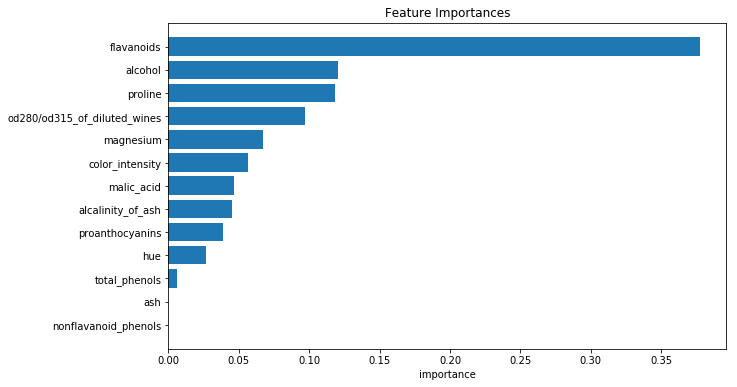

In [26]:
# Your code here.
create_plot_of_feature_importances(best_model, X)

"""
The top 3 improtant features for this datasets are 'flavanoids', 'alcohol', 'proline'
"""

## Principal Components Analysis

### Training a model with PCA-extracted features

In this section, you'll apply the unsupervised learning technique of Principal Components Analysis to the wine dataset. 

You'll use the principal components of the dataset as features in a machine learning model. You'll use the extracted features to train a vanilla Random Forest Classifier, and compare model performance to a model trained without PCA-extracted features. 

In the cell below, we import the data for you, and we split the data into training and test sets. 

In [97]:
import pandas as pd
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

wine = load_wine()
X = pd.DataFrame(X, columns=wine.feature_names)
y = pd.Series(y)
y.name = 'class'
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**3.1) Fit PCA to the training data.** 

Call the PCA instance you'll create `wine_pca`. Set `n_components=0.9` and make sure to use `random_state = 42`.

_Hint: Make sure to include necessary imports for **preprocessing the data!**_

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

# Create and fit an instance of PCA. Call it `wine_pca`. 
wine_pca = PCA(n_components = 0.9, random_state=42)
wine_pca.fit(X_train_scaled)


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

**3.2) How many principal components are there in the fitted PCA object?**

_Hint: Look at the list of attributes of trained `PCA` objects in the scikit-learn documentation_

In [99]:
# Replace None with appropriate code 
print('There are', wine_pca.n_components_, 'PCA estimated number of components')

There are 8 PCA estimated number of components


*Hint: you should end up with 8 components.*

Next, you'll reduce the dimensionality of the training data to the number of components that explain at least 90% of the variance in the data, and then you'll use this transformed data to fit a Random Forest classification model. 

You'll compare the performance of the model trained on the PCA-extracted features to the performance of a model trained using all features without feature extraction.

**3.3) Transform the training features into an array of reduced dimensionality using the `wine_pca` PCA object you've fit in the previous cell.** Call this array `X_train_pca`.

In [100]:
# Replace None with appropriate code  
X_train_pca = wine_pca.transform(X_train_scaled)

Next, we create a dataframe from this array of transformed features and we inspect the first five rows of the dataframe for you. 

In [101]:
# Create a dataframe from this array of transformed features
X_train_pca = pd.DataFrame(X_train_pca)

# Inspect the first five rows of the transformed features dataset
X_train_pca.head()

,0,1,2,3,4,5,6,7
0,-3.006949,-0.440982,-0.841225,0.340377,-1.173705,0.574376,0.495014,0.091746
1,0.478492,1.990401,-0.689619,0.427103,-0.360292,-0.533502,-0.010762,0.274893
2,1.406608,0.773276,-1.547031,-1.530376,1.808724,2.374277,-0.418017,0.092185
3,1.378122,-0.678679,0.637309,-1.015856,-0.617612,-0.429807,0.468740,-0.955370
4,0.803241,2.298979,-0.213368,1.173377,0.473106,-0.132372,0.657271,0.212064


#### You will now use the PCA-extracted features to train a random forest classification model.

**3.4) Instantiate a vanilla Random Forest Classifier (call it `rfc`) and fit it to the transformed training data.** Set `random_state = 42`. 

In [102]:
# Replace None with appropriate code 
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**3.5) Evaluate model performance on the test data and place model predictions in a variable called `y_pca_pred`.**

_Hint: Make sure to transform the test data the same way as you transformed the training data!!!_

Here is my general strategy to fit transform and transform a scaled dataset 
> ``` python
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform (X_test)
```

In [103]:
# Your code here 
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.shape)
X_test_pca = wine_pca.transform(X_test_scaled)
print(X_test_pca.shape)
y_pca_pred = rfc.predict(X_test_pca)
print(y_pca_pred.shape)

(54, 13)
(54, 8)
(54,)


In the cell below, we print the classification report for the model performance on the test data. 

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pca_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Run the cell below to fit a vanilla Random Forest Classifier to the untransformed training data,  evaluate its performance on the untransformed test data, and print the classification report for the model. 

In [105]:
vanilla_rfc = RandomForestClassifier(random_state=42)
vanilla_rfc.fit(X_train, y_train)

y_pred = vanilla_rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.95      0.86      0.90        21
           2       0.93      0.93      0.93        14

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



**3.6) Compare model performance. Did the overall accuracy of the model improve when using the transformed features?**

In [ ]:
# Your answer here 
"""
This is too good to be true. The accuracy score went up by 5% (from 93% to 98% ) when we train the random 
forest classifier using PCA-extracted features. The PCA algorithm helped us to only work on the 8 import 
features rather than using the whole 13 features.  
"""

## Clustering 

### Clustering Algorithms: k-means and hierarchical agglomerative clustering

#### 4.1) Using the gif below for reference, describe the steps of the k-means clustering algorithm.
* If the gif doesn't run, you may access it via [this link](images/good-centroid-start.gif).

<img src='images/good-centroid-start.gif'>

In [ ]:
# Your answer here
"""
At first, a four-dots  (green dots) were randomly chosen/selected as a centroid for the four clusters groups. 
Then the clustering algorithm starts to shift the location of the green dots with each iteration to optimize the 
cluster centroid until there is not much change in the centroid values or until it hits the set number of iteration. 
"""

### k-means Clustering

For this question, you will apply k-means clustering to your now friend, the wine dataset. 

You will use scikit-learn to fit k-means clustering models, and you will determine the optimal number of clusters to use by looking at silhouette scores. 

We load the wine dataset for you in the cell below. 

In [106]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
wine = load_wine()
X = pd.DataFrame(X, columns=wine.feature_names)
print(type(X))

<class 'pandas.core.frame.DataFrame'>


**4.2) Fit the k-means algorithm to the wine data for k values in the range 2 to 9 using the function given below. Obtain the silhouette scores for each trained k-means clustering model, and place the values in a list called `silhouette_scores`.** 

We have provided you with some starter code in the cell below.

_Hints: What imports do you need? Do you need to pre-process the data in any way before fitting the k-means clustering algorithm?_ 

In [108]:
from sklearn.cluster import KMeans
# we need to import silhouette_scores
from sklearn.metrics import silhouette_score


def get_labels(k, X):
    
    # Instantiate a k-means clustering model with random_state=1 and n_clusters=n 
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model to the data 
    kmeans.fit(X)
    
    # Return the predicted labels for each row in the data
    return kmeans.labels_

In [109]:
# Your code here

silhouette_scores = []

for k in range(2, 10):
    labels = get_labels(k, X)

    score = silhouette_score(X=X, labels=labels, metric='euclidean')

    silhouette_scores.append(score)

In [110]:
silhouette_scores

[0.6568536504294319,
 0.5711381937868844,
 0.5587089480903834,
 0.5489993239795691,
 0.5428943861491579,
 0.5621677013863717,
 0.5398971441034137,
 0.5316577207122241]

Run the cell below to plot the silhouette scores obtained for each different value of k against k, the number of clusters we asked the algorithm to find. 

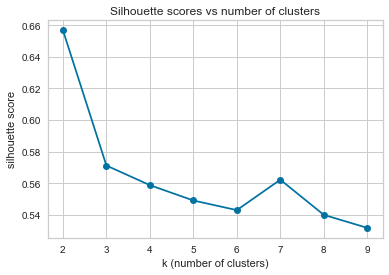

In [111]:
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score');

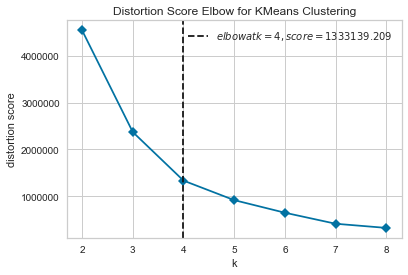

In [112]:
## additional conf using yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9), timings=False)#, metric='euclidean') 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show(); 

**4.3) Which value of k would you choose based on the plot of silhouette scores? How does this number compare to the number of classes in the wine dataset?**

Hint: this number should be <= 5.  If it's not, check your answer in the previous section.

In [116]:
# Your answer here 
"""
Basing both the silhouette scores plot and also the additional yellowbrick KElbowVisualizer, I would choose a k 
value of 4.
"""

## Finished!

Please submit only your notebook, named `mod5_assessment.ipynb`, [here](https://docs.google.com/forms/d/e/1FAIpQLSfpkAmplsFA4YX6-w4BNm21Thvg4FKrGWKkDguSfK1ASTvIXw/viewform?usp=sf_link).